# DECOY MNIST CNN Switch XIL on after n epochs experiments

### EXCEUTE ONLY FOR GOOGLE COLAB  !

In [1]:
# SETUP STUFF
# this mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Drive where you have saved the xil program 
FOLDERNAME = "Masterthesis/XIL_experiments/xil_framework"
assert FOLDERNAME is not None, "[!] Enter the foldername."

# now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/MyDrive/{}'.format(FOLDERNAME))

Mounted at /content/drive


In [ ]:
pip install captum

In [ ]:
pip install lime

In [4]:
cd /content/drive/MyDrive/Masterthesis/XIL_experiments/xil_framework/

/content/drive/MyDrive/Masterthesis/XIL_experiments/xil_framework


### Setup notebook


In [5]:
import logging

import torch
from torch import nn
from torch.nn import functional as F
import numpy as np

from learner.models import dnns
from learner.learner import Learner
from data_store.datasets import decoy_mnist, decoy_mnist_CE_augmented
from xil_methods.xil_loss import RRRLoss, RRRGradCamLoss, CDEPLoss, HINTLoss, RBRLoss
import util
import explainer

# Hyperparameters
EPOCHS = 64
BATCH_SIZE = 256
LR = 0.001
SAVE_LAST = True
VERBOSE_AFTER_N_EPOCHS = 2
DISABLE_FIRST_EPOCHS = 32
SEED = 10

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"[Using {DEVICE} device]")

# matplot magic
%matplotlib inline
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

[Using cuda device]


In [7]:
util.empty_log_run_model_store_folders()

### RRR: Switch on after 32 epochs 

[Using Seed= 10]
Loading dataset from existing file!
RRR -> Switch XIL on after 32 epochs:
Start training...
Epoch 2| accuracy: 98.0%, loss: 0.000255 | Test Error: Acc: 97.4%, Avg loss: 0.005976
Epoch 4| accuracy: 99.1%, loss: 0.000111 | Test Error: Acc: 96.4%, Avg loss: 0.006001
Epoch 6| accuracy: 99.5%, loss: 0.000054 | Test Error: Acc: 92.7%, Avg loss: 0.006143
Epoch 8| accuracy: 99.7%, loss: 0.000029 | Test Error: Acc: 87.6%, Avg loss: 0.006341
Epoch 10| accuracy: 99.7%, loss: 0.000032 | Test Error: Acc: 88.6%, Avg loss: 0.006297
Epoch 12| accuracy: 99.6%, loss: 0.000041 | Test Error: Acc: 85.2%, Avg loss: 0.006436
Epoch 14| accuracy: 99.8%, loss: 0.000021 | Test Error: Acc: 83.7%, Avg loss: 0.006493
Epoch 16| accuracy: 99.8%, loss: 0.000020 | Test Error: Acc: 79.6%, Avg loss: 0.006654
Epoch 18| accuracy: 99.7%, loss: 0.000031 | Test Error: Acc: 80.7%, Avg loss: 0.006608
Epoch 20| accuracy: 99.8%, loss: 0.000024 | Test Error: Acc: 79.4%, Avg loss: 0.006664
Epoch 22| accuracy: 99.8%

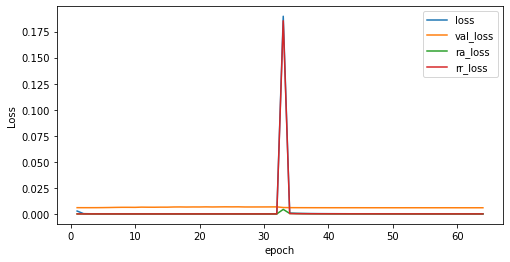

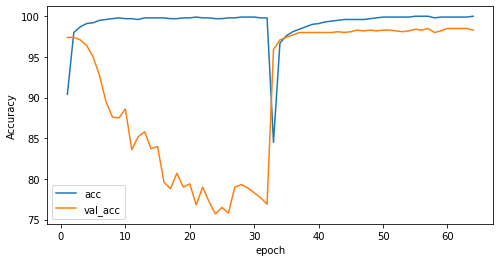

In [8]:
############# Initalize dataset and dataloader
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(device=DEVICE, batch_size=BATCH_SIZE)

#######################################################################
print("RRR -> Switch XIL on after 32 epochs:")

########### initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(DEVICE)
loss_fn = RRRLoss(10)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

############ Learn routine
learner = Learner(model, loss_fn, optimizer, DEVICE, 'SwitchOnAfter32-DecoyMnist-CNN-RRR--reg=10--seed=10')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS, disable_xil_loss_first_n_epochs=DISABLE_FIRST_EPOCHS)

learner.plot_loss_acc()


### RRRGradCam: Switch XIL on after 32 epochs

[Using Seed= 10]
Loading dataset from existing file!
RRRGradCam -> Switch XIL on after 32 epochs:
Start training...
Epoch 2| accuracy: 98.0%, loss: 0.000255 | Test Error: Acc: 97.4%, Avg loss: 0.005976
Epoch 4| accuracy: 99.1%, loss: 0.000111 | Test Error: Acc: 96.4%, Avg loss: 0.006001
Epoch 6| accuracy: 99.5%, loss: 0.000054 | Test Error: Acc: 92.7%, Avg loss: 0.006143
Epoch 8| accuracy: 99.7%, loss: 0.000029 | Test Error: Acc: 87.6%, Avg loss: 0.006341
Epoch 10| accuracy: 99.7%, loss: 0.000032 | Test Error: Acc: 88.6%, Avg loss: 0.006297
Epoch 12| accuracy: 99.6%, loss: 0.000041 | Test Error: Acc: 85.2%, Avg loss: 0.006436
Epoch 14| accuracy: 99.8%, loss: 0.000021 | Test Error: Acc: 83.7%, Avg loss: 0.006493
Epoch 16| accuracy: 99.8%, loss: 0.000020 | Test Error: Acc: 79.6%, Avg loss: 0.006654
Epoch 18| accuracy: 99.7%, loss: 0.000031 | Test Error: Acc: 80.7%, Avg loss: 0.006608
Epoch 20| accuracy: 99.8%, loss: 0.000024 | Test Error: Acc: 79.4%, Avg loss: 0.006664
Epoch 22| accuracy

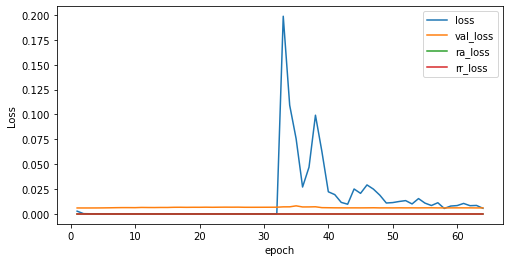

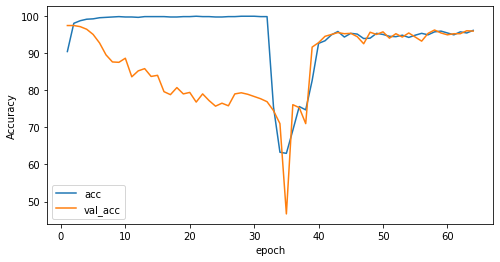

In [9]:
############# Initalize dataset and dataloader
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(device=DEVICE, batch_size=BATCH_SIZE)

#######################################################################
print("RRRGradCam -> Switch XIL on after 32 epochs:")

########### initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(DEVICE)
loss_fn = RRRGradCamLoss(10)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

############ Learn routine
learner = Learner(model, loss_fn, optimizer, DEVICE, 'SwitchOnAfter32-DecoyMnist-CNN-RRRGradCam--reg=1--seed=10')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS, disable_xil_loss_first_n_epochs=DISABLE_FIRST_EPOCHS)

learner.plot_loss_acc()


### RBR: Switch XIL on after 32 epochs

[Using Seed= 10]
Loading dataset from existing file!
RBR -> Switch XIL on after 32 epochs:
Start training...
Epoch 2| accuracy: 98.0%, loss: 0.000255 | Test Error: Acc: 97.4%, Avg loss: 0.005976
Epoch 4| accuracy: 99.1%, loss: 0.000111 | Test Error: Acc: 96.4%, Avg loss: 0.006001
Epoch 6| accuracy: 99.5%, loss: 0.000054 | Test Error: Acc: 92.7%, Avg loss: 0.006143
Epoch 8| accuracy: 99.7%, loss: 0.000029 | Test Error: Acc: 87.6%, Avg loss: 0.006341
Epoch 10| accuracy: 99.7%, loss: 0.000032 | Test Error: Acc: 88.6%, Avg loss: 0.006297
Epoch 12| accuracy: 99.6%, loss: 0.000041 | Test Error: Acc: 85.2%, Avg loss: 0.006436
Epoch 14| accuracy: 99.8%, loss: 0.000021 | Test Error: Acc: 83.7%, Avg loss: 0.006493
Epoch 16| accuracy: 99.8%, loss: 0.000020 | Test Error: Acc: 79.6%, Avg loss: 0.006654
Epoch 18| accuracy: 99.7%, loss: 0.000031 | Test Error: Acc: 80.7%, Avg loss: 0.006608
Epoch 20| accuracy: 99.8%, loss: 0.000024 | Test Error: Acc: 79.4%, Avg loss: 0.006664
Epoch 22| accuracy: 99.8%

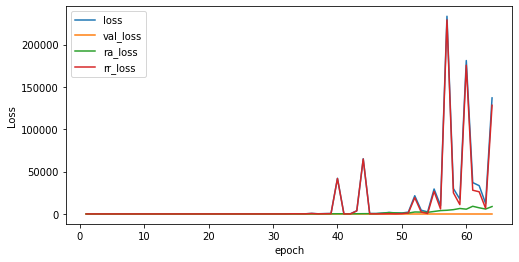

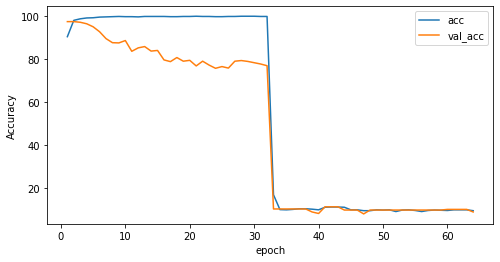

In [10]:
############# Initalize dataset and dataloader
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(device=DEVICE, batch_size=BATCH_SIZE)

#######################################################################
print("RBR -> Switch XIL on after 32 epochs:")

########### initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(DEVICE)
loss_fn = RBRLoss(1000000)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

############ Learn routine
learner = Learner(model, loss_fn, optimizer, DEVICE, 'SwitchOnAfter32-DecoyMnist-CNN-RBR--reg=1M--seed=10')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS, disable_xil_loss_first_n_epochs=DISABLE_FIRST_EPOCHS)

learner.plot_loss_acc()


[Using Seed= 10]
Loading dataset from existing file!
RBR -> Switch XIL on after 32 epochs:
Start training...
Epoch 2| accuracy: 98.0%, loss: 0.000260 | Test Error: Acc: 97.7%, Avg loss: 0.005966
Epoch 4| accuracy: 99.1%, loss: 0.000111 | Test Error: Acc: 96.4%, Avg loss: 0.006002
Epoch 6| accuracy: 99.6%, loss: 0.000049 | Test Error: Acc: 92.0%, Avg loss: 0.006180
Epoch 8| accuracy: 99.7%, loss: 0.000036 | Test Error: Acc: 88.6%, Avg loss: 0.006298
Epoch 10| accuracy: 99.7%, loss: 0.000036 | Test Error: Acc: 86.3%, Avg loss: 0.006384
Epoch 12| accuracy: 99.8%, loss: 0.000025 | Test Error: Acc: 82.4%, Avg loss: 0.006539
Epoch 14| accuracy: 99.7%, loss: 0.000040 | Test Error: Acc: 85.8%, Avg loss: 0.006406
Epoch 16| accuracy: 99.8%, loss: 0.000018 | Test Error: Acc: 82.1%, Avg loss: 0.006559
Epoch 18| accuracy: 99.7%, loss: 0.000033 | Test Error: Acc: 79.5%, Avg loss: 0.006657
Epoch 20| accuracy: 99.8%, loss: 0.000023 | Test Error: Acc: 78.3%, Avg loss: 0.006695
Epoch 22| accuracy: 99.8%

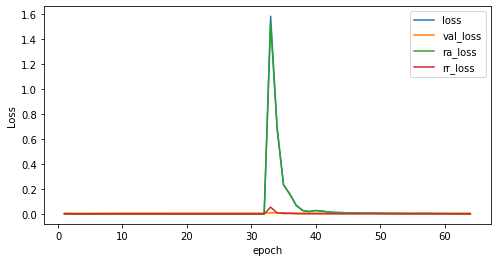

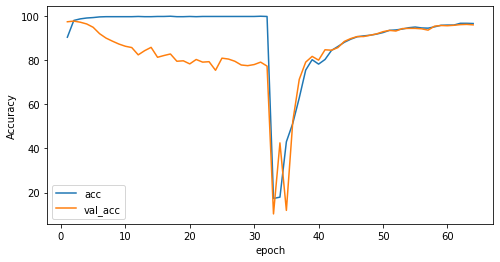

In [9]:
############# Initalize dataset and dataloader
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(device=DEVICE, batch_size=BATCH_SIZE)

#######################################################################
print("RBR -> Switch XIL on after 32 epochs:")

########### initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(DEVICE)
loss_fn = RBRLoss(1000)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

############ Learn routine
learner = Learner(model, loss_fn, optimizer, DEVICE, 'SwitchOnAfter32-DecoyMnist-CNN-RBR--reg=10k--seed=10')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS, disable_xil_loss_first_n_epochs=DISABLE_FIRST_EPOCHS)

learner.plot_loss_acc()


[Using Seed= 10]
Loading dataset from existing file!
RBR -> Switch XIL on after 32 epochs:
Start training...
Epoch 2| accuracy: 82.1%, loss: 0.002359 | Test Error: Acc: 86.6%, Avg loss: 0.006477
Epoch 4| accuracy: 91.1%, loss: 0.001202 | Test Error: Acc: 91.8%, Avg loss: 0.006237
Epoch 6| accuracy: 93.6%, loss: 0.000848 | Test Error: Acc: 93.9%, Avg loss: 0.006148
Epoch 8| accuracy: 95.1%, loss: 0.000652 | Test Error: Acc: 95.0%, Avg loss: 0.006096
Epoch 10| accuracy: 96.1%, loss: 0.000523 | Test Error: Acc: 95.8%, Avg loss: 0.006061
Epoch 12| accuracy: 96.8%, loss: 0.000431 | Test Error: Acc: 96.3%, Avg loss: 0.006035
Epoch 14| accuracy: 97.3%, loss: 0.000364 | Test Error: Acc: 96.6%, Avg loss: 0.006016
Epoch 16| accuracy: 97.7%, loss: 0.000312 | Test Error: Acc: 96.9%, Avg loss: 0.006001
Epoch 18| accuracy: 98.0%, loss: 0.000270 | Test Error: Acc: 97.2%, Avg loss: 0.005989
Epoch 20| accuracy: 98.2%, loss: 0.000234 | Test Error: Acc: 97.4%, Avg loss: 0.005980
Epoch 22| accuracy: 98.5%

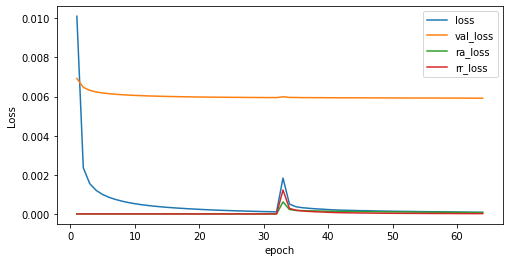

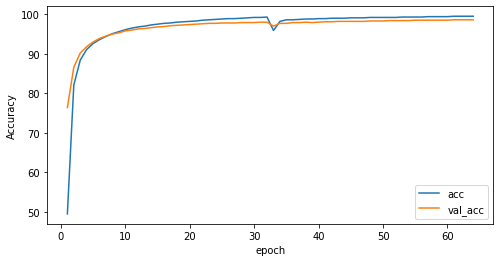

In [15]:
############# Initalize dataset and dataloader
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(device=DEVICE, batch_size=BATCH_SIZE)

#######################################################################
print("RBR -> Switch XIL on after 32 epochs:")

########### initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(DEVICE)
loss_fn = RBRLoss(1000000)
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)

############ Learn routine
learner = Learner(model, loss_fn, optimizer, DEVICE, 'SwitchOnAfter32-DecoyMnist-CNN-RBR--reg=1M--seed=10-lr0.00001')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS, disable_xil_loss_first_n_epochs=DISABLE_FIRST_EPOCHS)

learner.plot_loss_acc()


### CDEP: Switch XIL on after 32 epochs

[Using Seed= 10]
Loading dataset from existing file!
CDEP -> Switch XIL on after 32 epochs:
Start training...
Epoch 2| accuracy: 98.0%, loss: 0.000255 | Test Error: Acc: 97.4%, Avg loss: 0.005976
Epoch 4| accuracy: 99.1%, loss: 0.000111 | Test Error: Acc: 96.4%, Avg loss: 0.006001
Epoch 6| accuracy: 99.5%, loss: 0.000054 | Test Error: Acc: 92.7%, Avg loss: 0.006143
Epoch 8| accuracy: 99.7%, loss: 0.000029 | Test Error: Acc: 87.6%, Avg loss: 0.006341
Epoch 10| accuracy: 99.7%, loss: 0.000032 | Test Error: Acc: 88.6%, Avg loss: 0.006297
Epoch 12| accuracy: 99.6%, loss: 0.000041 | Test Error: Acc: 85.2%, Avg loss: 0.006436
Epoch 14| accuracy: 99.8%, loss: 0.000021 | Test Error: Acc: 83.7%, Avg loss: 0.006493
Epoch 16| accuracy: 99.8%, loss: 0.000020 | Test Error: Acc: 79.6%, Avg loss: 0.006654
Epoch 18| accuracy: 99.7%, loss: 0.000031 | Test Error: Acc: 80.7%, Avg loss: 0.006608
Epoch 20| accuracy: 99.8%, loss: 0.000024 | Test Error: Acc: 79.4%, Avg loss: 0.006664
Epoch 22| accuracy: 99.8

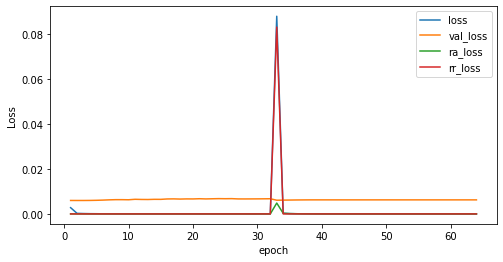

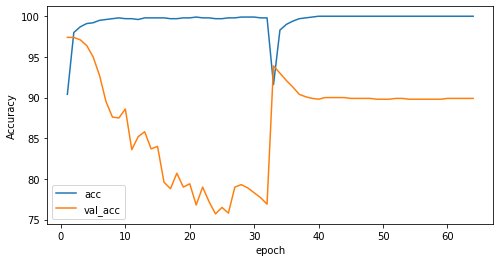

In [11]:
############# Initalize dataset and dataloader
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(device=DEVICE, batch_size=BATCH_SIZE)

#######################################################################
print("CDEP -> Switch XIL on after 32 epochs:")

########### initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(DEVICE)
loss_fn = CDEPLoss(1000)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

############ Learn routine
learner = Learner(model, loss_fn, optimizer, DEVICE, 'SwitchOnAfter32-DecoyMnist-CNN-CDEP--reg=1k--seed=10')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS, disable_xil_loss_first_n_epochs=DISABLE_FIRST_EPOCHS)

learner.plot_loss_acc()


### HINT: Switch XIL on after 32 epochs

[Using Seed= 10]
Loading dataset from existing file!
HINT -> Switch XIL on after 32 epochs:
Start training...
Epoch 2| accuracy: 98.0%, loss: 0.000255 | Test Error: Acc: 97.4%, Avg loss: 0.005976
Epoch 4| accuracy: 99.1%, loss: 0.000111 | Test Error: Acc: 96.4%, Avg loss: 0.006001
Epoch 6| accuracy: 99.5%, loss: 0.000054 | Test Error: Acc: 92.7%, Avg loss: 0.006143
Epoch 8| accuracy: 99.7%, loss: 0.000029 | Test Error: Acc: 87.6%, Avg loss: 0.006341
Epoch 10| accuracy: 99.7%, loss: 0.000032 | Test Error: Acc: 88.6%, Avg loss: 0.006297
Epoch 12| accuracy: 99.6%, loss: 0.000041 | Test Error: Acc: 85.2%, Avg loss: 0.006436
Epoch 14| accuracy: 99.8%, loss: 0.000021 | Test Error: Acc: 83.7%, Avg loss: 0.006493
Epoch 16| accuracy: 99.8%, loss: 0.000020 | Test Error: Acc: 79.6%, Avg loss: 0.006654
Epoch 18| accuracy: 99.7%, loss: 0.000031 | Test Error: Acc: 80.7%, Avg loss: 0.006608
Epoch 20| accuracy: 99.8%, loss: 0.000024 | Test Error: Acc: 79.4%, Avg loss: 0.006664
Epoch 22| accuracy: 99.8

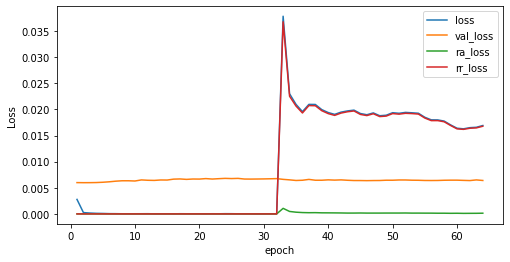

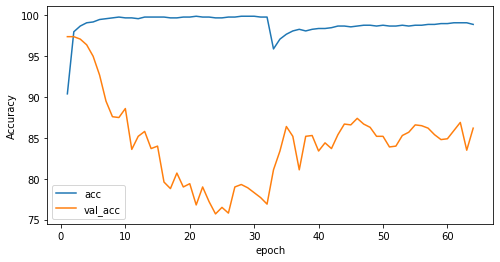

In [12]:
############# Initalize dataset and dataloader
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(hint_expl=True, device=DEVICE, batch_size=BATCH_SIZE)

#######################################################################
print("HINT -> Switch XIL on after 32 epochs:")

########### initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(DEVICE)
loss_fn = HINTLoss(100, last_conv_specified=True, upsample=False)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

############ Learn routine
learner = Learner(model, loss_fn, optimizer, DEVICE, 'SwitchOnAfter32-DecoyMnist-CNN-HINT--reg=100--seed=10--downsample')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST,verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS, disable_xil_loss_first_n_epochs=DISABLE_FIRST_EPOCHS)

learner.plot_loss_acc()


### CE: Switch XIL on after 32 epochs 

[Using Seed= 10]
Loading dataset from existing file!
CE -> Switch XIL on after 32 epochs:
Start training...
Epoch 1| accuracy: 90.4%, loss: 0.002775 | Test Error: Acc: 97.4%, Avg loss: 0.005990
Epoch 2| accuracy: 98.0%, loss: 0.000255 | Test Error: Acc: 97.4%, Avg loss: 0.005976
Epoch 3| accuracy: 98.7%, loss: 0.000164 | Test Error: Acc: 97.1%, Avg loss: 0.005981
Epoch 4| accuracy: 99.1%, loss: 0.000111 | Test Error: Acc: 96.4%, Avg loss: 0.006001
Epoch 5| accuracy: 99.2%, loss: 0.000088 | Test Error: Acc: 95.0%, Avg loss: 0.006057
Epoch 6| accuracy: 99.5%, loss: 0.000054 | Test Error: Acc: 92.7%, Avg loss: 0.006143
Epoch 7| accuracy: 99.6%, loss: 0.000047 | Test Error: Acc: 89.5%, Avg loss: 0.006262
Epoch 8| accuracy: 99.7%, loss: 0.000029 | Test Error: Acc: 87.6%, Avg loss: 0.006341
Epoch 9| accuracy: 99.8%, loss: 0.000026 | Test Error: Acc: 87.5%, Avg loss: 0.006341
Epoch 10| accuracy: 99.7%, loss: 0.000032 | Test Error: Acc: 88.6%, Avg loss: 0.006297
Epoch 11| accuracy: 99.7%, loss

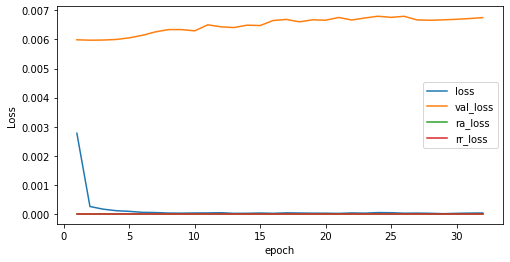

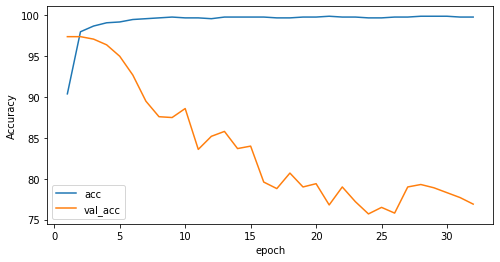

Loading dataset from existing file!
Train set was augmented: X.size= 120000, y.size= 120000
Start training...
Epoch 1| accuracy: 98.9%, loss: 0.000259 | Test Error: Acc: 98.2%, Avg loss: 0.005919
Epoch 2| accuracy: 99.7%, loss: 0.000042 | Test Error: Acc: 98.6%, Avg loss: 0.005904
Epoch 3| accuracy: 99.9%, loss: 0.000017 | Test Error: Acc: 98.6%, Avg loss: 0.005904
Epoch 4| accuracy: 99.9%, loss: 0.000014 | Test Error: Acc: 98.6%, Avg loss: 0.005901
Epoch 5| accuracy: 99.8%, loss: 0.000018 | Test Error: Acc: 98.3%, Avg loss: 0.005913
Epoch 6| accuracy: 99.7%, loss: 0.000048 | Test Error: Acc: 98.3%, Avg loss: 0.005910
Epoch 7| accuracy: 99.8%, loss: 0.000032 | Test Error: Acc: 98.5%, Avg loss: 0.005903
Epoch 8| accuracy: 99.8%, loss: 0.000024 | Test Error: Acc: 98.5%, Avg loss: 0.005904
Epoch 9| accuracy: 99.7%, loss: 0.000043 | Test Error: Acc: 98.5%, Avg loss: 0.005905
Epoch 10| accuracy: 99.8%, loss: 0.000024 | Test Error: Acc: 98.7%, Avg loss: 0.005897
Epoch 11| accuracy: 99.9%, lo

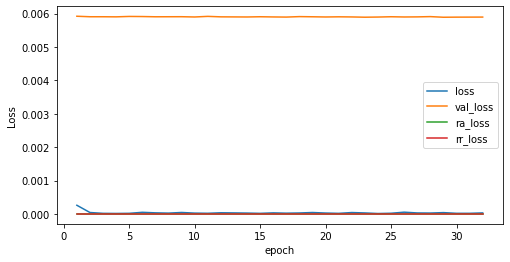

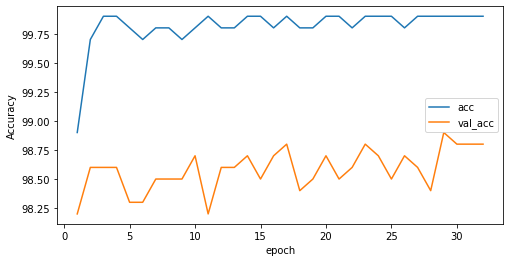

In [13]:
############# Initalize dataset and dataloader
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(device=DEVICE, batch_size=BATCH_SIZE)

#######################################################################
print("CE -> Switch XIL on after 32 epochs:")

# Train for 32 epochs on CEL
########### initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(DEVICE)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

############ Learn routine
learner = Learner(model, loss_fn, optimizer, DEVICE, 'SwitchOnAfter32-DecoyMnist-CNN-CE--reg=60k--seed=10')
learner.fit(train_dataloader, test_dataloader, DISABLE_FIRST_EPOCHS, save_last=SAVE_LAST)
learner.plot_loss_acc()

# CE augment dataset
train_loader, test_loader = decoy_mnist_CE_augmented(device=DEVICE, \
                    batch_size=BATCH_SIZE, n_instances=600000, \
                        n_counterexamples_per_instance=1, ce_strategy='random')
learner.fit(train_loader, test_loader, DISABLE_FIRST_EPOCHS, save_last=SAVE_LAST)
learner.plot_loss_acc()


RBR TESTING

[Using Seed= 10]
Loading dataset from existing file!
RBR -> Switch XIL on after 32 epochs:
Start training...
Epoch 2| accuracy: 98.0%, loss: 0.000258 | Test Error: Acc: 97.6%, Avg loss: 0.005970
Epoch 4| accuracy: 99.1%, loss: 0.000108 | Test Error: Acc: 96.5%, Avg loss: 0.006000
Epoch 6| accuracy: 99.4%, loss: 0.000068 | Test Error: Acc: 94.4%, Avg loss: 0.006083
Epoch 8| accuracy: 99.6%, loss: 0.000054 | Test Error: Acc: 93.8%, Avg loss: 0.006114
Epoch 10| accuracy: 99.6%, loss: 0.000047 | Test Error: Acc: 92.2%, Avg loss: 0.006168
Epoch 12| accuracy: 99.7%, loss: 0.000039 | Test Error: Acc: 92.9%, Avg loss: 0.006140
Epoch 14| accuracy: 99.7%, loss: 0.000037 | Test Error: Acc: 92.4%, Avg loss: 0.006160
Epoch 16| accuracy: 99.5%, loss: 0.000066 | Test Error: Acc: 90.8%, Avg loss: 0.006218
Epoch 18| accuracy: 99.9%, loss: 0.000007 | Test Error: Acc: 91.0%, Avg loss: 0.006207
Epoch 20| accuracy: 99.6%, loss: 0.000056 | Test Error: Acc: 90.1%, Avg loss: 0.006247
Epoch 22| accuracy: 99.7%

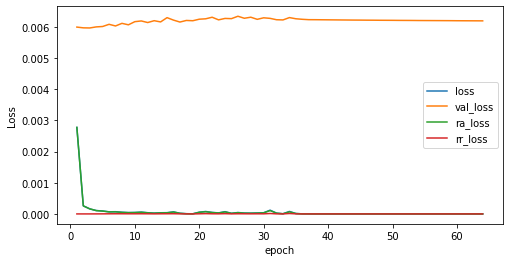

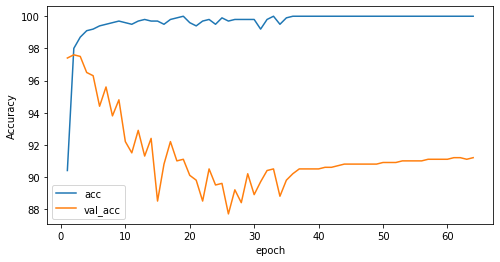

In [22]:
############# Initalize dataset and dataloader
util.seed_all(SEED)
train_dataloader, test_dataloader = decoy_mnist(device=DEVICE, batch_size=BATCH_SIZE)

#######################################################################
print("RBR -> Switch XIL on after 32 epochs:")

########### initalize model, loss and optimizer
model = dnns.SimpleConvNet().to(DEVICE)
loss_fn = RBRLoss(1000)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

############ Learn routine
learner = Learner(model, loss_fn, optimizer, DEVICE, 'test1')
learner.fit(train_dataloader, test_dataloader, EPOCHS, save_last=SAVE_LAST, verbose_after_n_epochs=VERBOSE_AFTER_N_EPOCHS)

learner.plot_loss_acc()
